# 마켓과 머신러닝
## 1. 생선 분류 문제
###  - 도미의 길이(cm)와 무게(g) 정보 제공

In [44]:
#도미의 길이(cm)와 무게(g) 정보 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

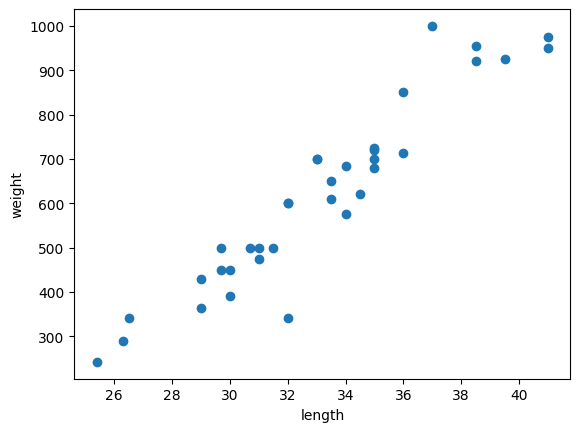

In [45]:
# 산점도 그래프 표현 (scatter plot)
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축은 도미의 길이
plt.ylabel('weight') # y축은 도미의 무게
plt.show()

In [46]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

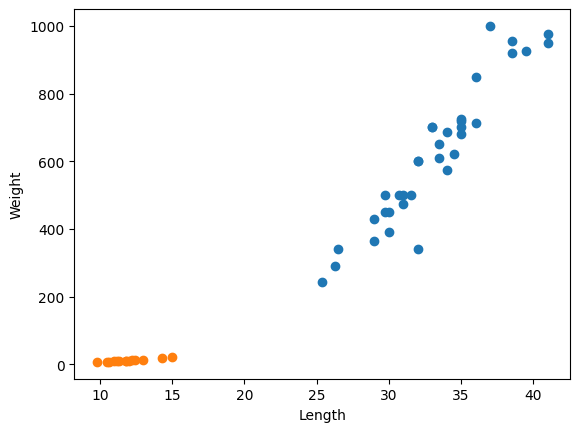

In [47]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [48]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

# 각 생선의 길이와 무개를 한쌍으로 합쳐진 2차원 리스트로 생성
# 사이킷런은 각 개체별 한쌍으로 이루어진 데이터를 원하기때문에 이렇게 진행한다.
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [66]:
print('Length = {0}, {1}'.format(len(bream_length), len(smelt_length)))

fish_target = [1] * len(bream_length) + [0] * len(smelt_length)
print(fish_target)

Length = 35, 14
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
# K-NN(K-Nearest Neighbors[K-최근접 이웃]) 알고리즘 사용을 위해
# 사이킷런 사용
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# 사이킷런 생선데이터 훈련 (fit 이라는 함수를 이용해서 훈련시킨다.)
kn.fit(fish_data, fish_target)

# 얼마나 잘 분류되었는지 점수 매김
kn.score(fish_data, fish_target)


1.0

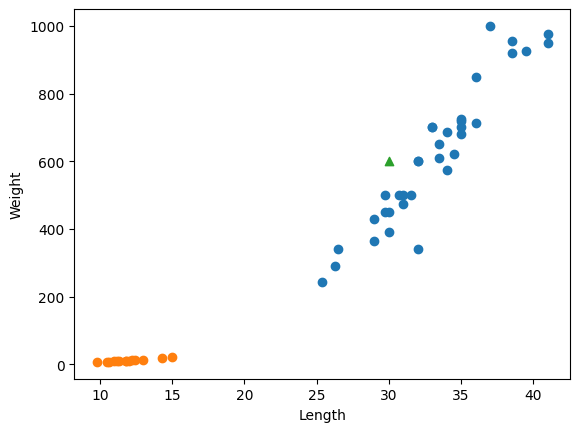

In [ ]:
# 분류 대상 샘플 데이터 넣고 차트 표시
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.scatter(30, 600, marker='^')
plt.show()

In [ ]:
# 분류훈련된 모델에 테스트데이타 값을 넣어 모델의 예측값 받기
kn.predict([[30, 600]])

array([1])

In [ ]:
# KNeighborsClassfier는 기본이 주변 neighbors 이웃 샘플데이터값을 5개만 참조한다.
# 좀더 정확한 예측을 위해 모든 이웃 샘플 데이터를 참조하도록
# n_neighbors에 참조할 이웃 샘플데이터를 49개로 변경 한다.
kn49 = KNeighborsClassifier(n_neighbors=49)

# 생선데이터와 예측값 훈련
kn49.fit(fish_data, fish_target)

# 모델의 정확도 예측값 
kn49.score(fish_data, fish_target)

0.7142857142857143